# Single Well Assay with 0.5 uM dialyzed p38, Abl WT, Abl GK, Src WT, and Src GK in non-binding plate; Das, Imat, Pon, Stauro

### Plot single wv data

In [13]:
# %load single wavelength data


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


import assaytools


from assaytools import platereader


filenames = ['p38_Abl_WT_GK_Src_WT_GK_conc_0_20190307_143620.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_1_20190307_144756.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_2_20190307_145749.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_3_20190307_150742.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_4_20190307_151735.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_5_20190307_152726.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_6_20190307_153717.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_7_20190307_154708.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_8_20190307_155700.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_9_20190307_160653.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_10_20190307_161647.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_11_20190307_162638.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_12_20190307_163631.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_13_20190307_164624.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_14_20190307_165624.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_15_20190307_170620.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_16_20190307_171619.xml']

datapath = 'infinite_results'


concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])


reads_20190307 = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads_20190307.append(read)
    
plate_layout = pd.read_excel('20190307_plate_layout_for_binding_assay.xlsx', header=None)
plate_layout = plate_layout.loc[:, 0:1]
plate_layout.columns = ['well', 'name']
if len(list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')) > 0:
    list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')

In [23]:
# need to associate reads with correct well
nrows = 8
ncols = 12
index = 0

title = 'Fluorescence Reads Ex 280 nm Em 480 nm'

label = 'ex280_em480_top_gain100'

data_20190307 = np.zeros([nrows, ncols, nreads], np.float64) 
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements = [(reads_20190307[i][label][well]) for i in range(nreads)]
        for i in range(nreads):
            measurements = [x if x != 'OVER' else 70000 for x in measurements]
            measurements = [float(i) for i in measurements]
        data_20190307[row_index,col_index,:] = np.array(measurements)
        print(well)
        print(data_20190307[row_index,col_index,:])

A1
[2562. 2544. 2539. 2573. 2639. 2679. 2711. 2818. 2881. 2976. 3025. 3079.
 3183. 3262. 3266. 3266. 3292.]
A2
[2700. 2676. 2636. 2651. 2635. 2625. 2607. 2599. 2584. 2585. 2602. 2613.
 2644. 2698. 2840. 3065. 3575.]
A3
[2705. 2673. 2643. 2670. 2664. 2640. 2595. 2602. 2612. 2601. 2598. 2631.
 2653. 2721. 2829. 3019. 3508.]
A4
[2705. 2664. 2659. 2642. 2625. 2631. 2603. 2595. 2580. 2602. 2598. 2600.
 2663. 2710. 2860. 3035. 3553.]
A5
[2703. 2680. 2663. 2659. 2644. 2630. 2612. 2621. 2570. 2608. 2618. 2626.
 2647. 2710. 2833. 3021. 3491.]
A6
[2676. 2640. 2613. 2625. 2612. 2600. 2572. 2549. 2564. 2591. 2583. 2584.
 2633. 2692. 2810. 2998. 3499.]
A7
[2628. 2576. 2575. 2576. 2589. 2548. 2536. 2540. 2509. 2543. 2533. 2558.
 2871. 2644. 3059. 2947. 3502.]
A8
[2632. 2614. 2588. 2590. 2588. 2572. 2541. 2534. 2520. 2544. 2555. 2572.
 2617. 2649. 2795. 2963. 3500.]
A9
[2628. 2601. 2583. 2563. 2572. 2569. 2522. 2533. 2551. 2538. 2534. 2552.
 2587. 2642. 2774. 2912. 3439.]
A10
[2726. 2695. 2665. 2672.

## Plot fluorescence at single wv (480 nm)

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

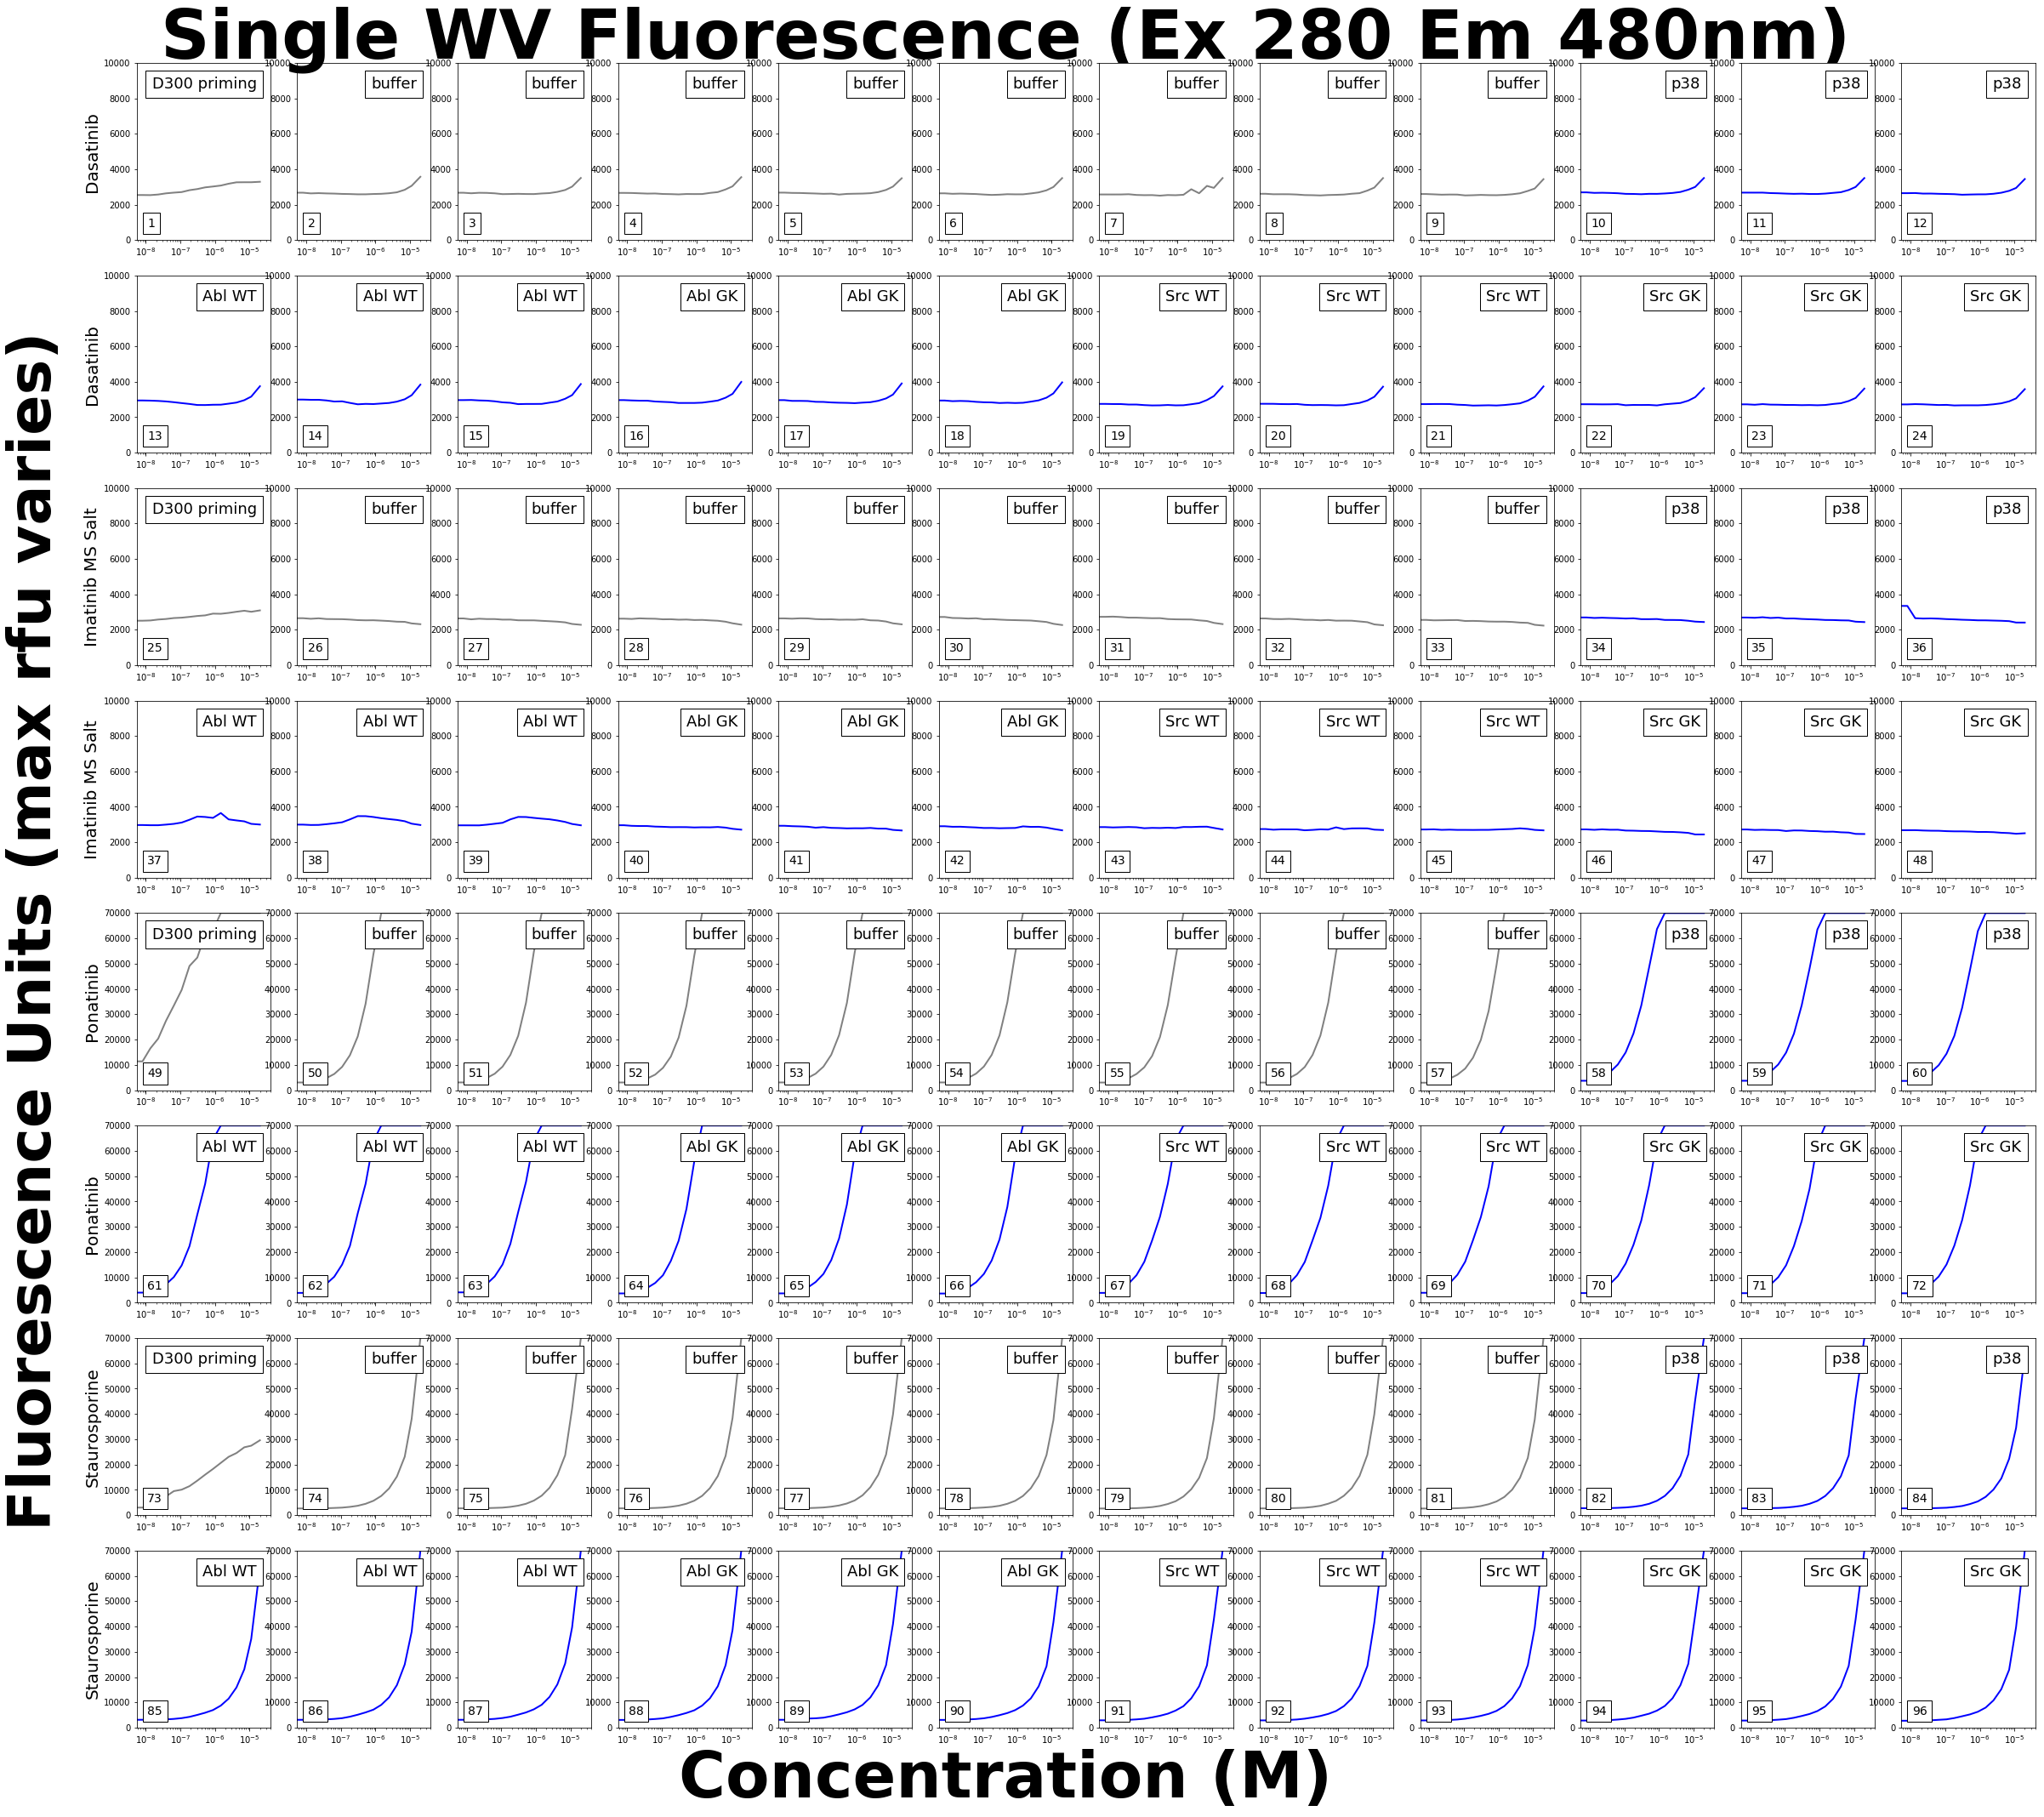

In [24]:
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Single WV Fluorescence (Ex 280 Em 480nm)'

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color='b'
            plt.semilogx(x_values, data_20190307[row_index,col_index,:], c=color, linewidth=2);

        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 89:
            plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=80, fontweight='bold')
        if index == 85:
            axis = plt.gca()
            plt.ylabel('Fluorescence Units (max rfu varies)', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.75,4.5)

        if index < 48:
            plt.ylim(0,10000)
        else:
            plt.ylim(0,70000)
                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Dasatinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Imatinib MS Salt', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Ponatinib', fontsize=20)
        if index == 72 or index == 84:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

fig.savefig('20190307_multiple_yax_scale_single_well_single_wv_ligs5-8_log_y.pdf', bbox_inches='tight', dpi=300)

## Plot single wv absorbance at 280 nm across concentrations

In [9]:
# need to associate reads with correct well

nrows = 8
ncols = 12
index = 0

label = 'abs_280'

data_abs = np.zeros([nrows, ncols, nreads], np.float64) 
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements_abs = [(reads[i][label][well]) for i in range(nreads)]
        for i in range(nreads):
            measurements_abs = [x if x != 'OVER' else 0 for x in measurements_abs]
            measurements_abs = [float(i) for i in measurements_abs]
        data_abs[row_index,col_index,:] = np.array(measurements_abs)
        print(well)
        print(data_abs[row_index,col_index,:])

A1
[1.6259 1.6277 1.6277 1.6268 1.6257 1.6257 1.6267 1.6278 1.6279 1.6278
 1.6294 1.6284 1.63   1.6297 1.6307 1.6307 1.6326]
A2
[1.6291 1.6377 1.6383 1.6374 1.6386 1.6378 1.6378 1.6386 1.6395 1.6413
 1.642  1.6429 1.6451 1.6452 1.6485 1.6537 1.6635]
A3
[1.6351 1.6419 1.6449 1.6428 1.6423 1.6437 1.6457 1.6457 1.6465 1.6483
 1.65   1.6493 1.6522 1.6523 1.6549 1.661  1.6691]
A4
[1.6421 1.6499 1.6523 1.6511 1.6518 1.6521 1.6533 1.654  1.6556 1.6562
 1.6582 1.6577 1.6601 1.6608 1.6637 1.6692 1.6768]
A5
[1.653  1.6611 1.6623 1.6614 1.6617 1.6618 1.6641 1.6643 1.6667 1.6669
 1.6699 1.6678 1.671  1.6715 1.6748 1.6784 1.6879]
A6
[1.6584 1.6669 1.6678 1.6673 1.6663 1.6661 1.6675 1.6692 1.6698 1.6709
 1.672  1.6721 1.6751 1.6753 1.6794 1.6863 1.6972]
A7
[1.6687 1.6749 1.6775 1.6753 1.6758 1.6755 1.6778 1.6776 1.6791 1.6792
 1.6814 1.6858 1.681  1.6864 1.6891 1.693  1.7021]
A8
[1.6567 1.6643 1.6701 1.6666 1.6673 1.6664 1.668  1.6683 1.6737 1.6745
 1.6706 1.6707 1.6738 1.6745 1.6799 1.686  1.698 ]


/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

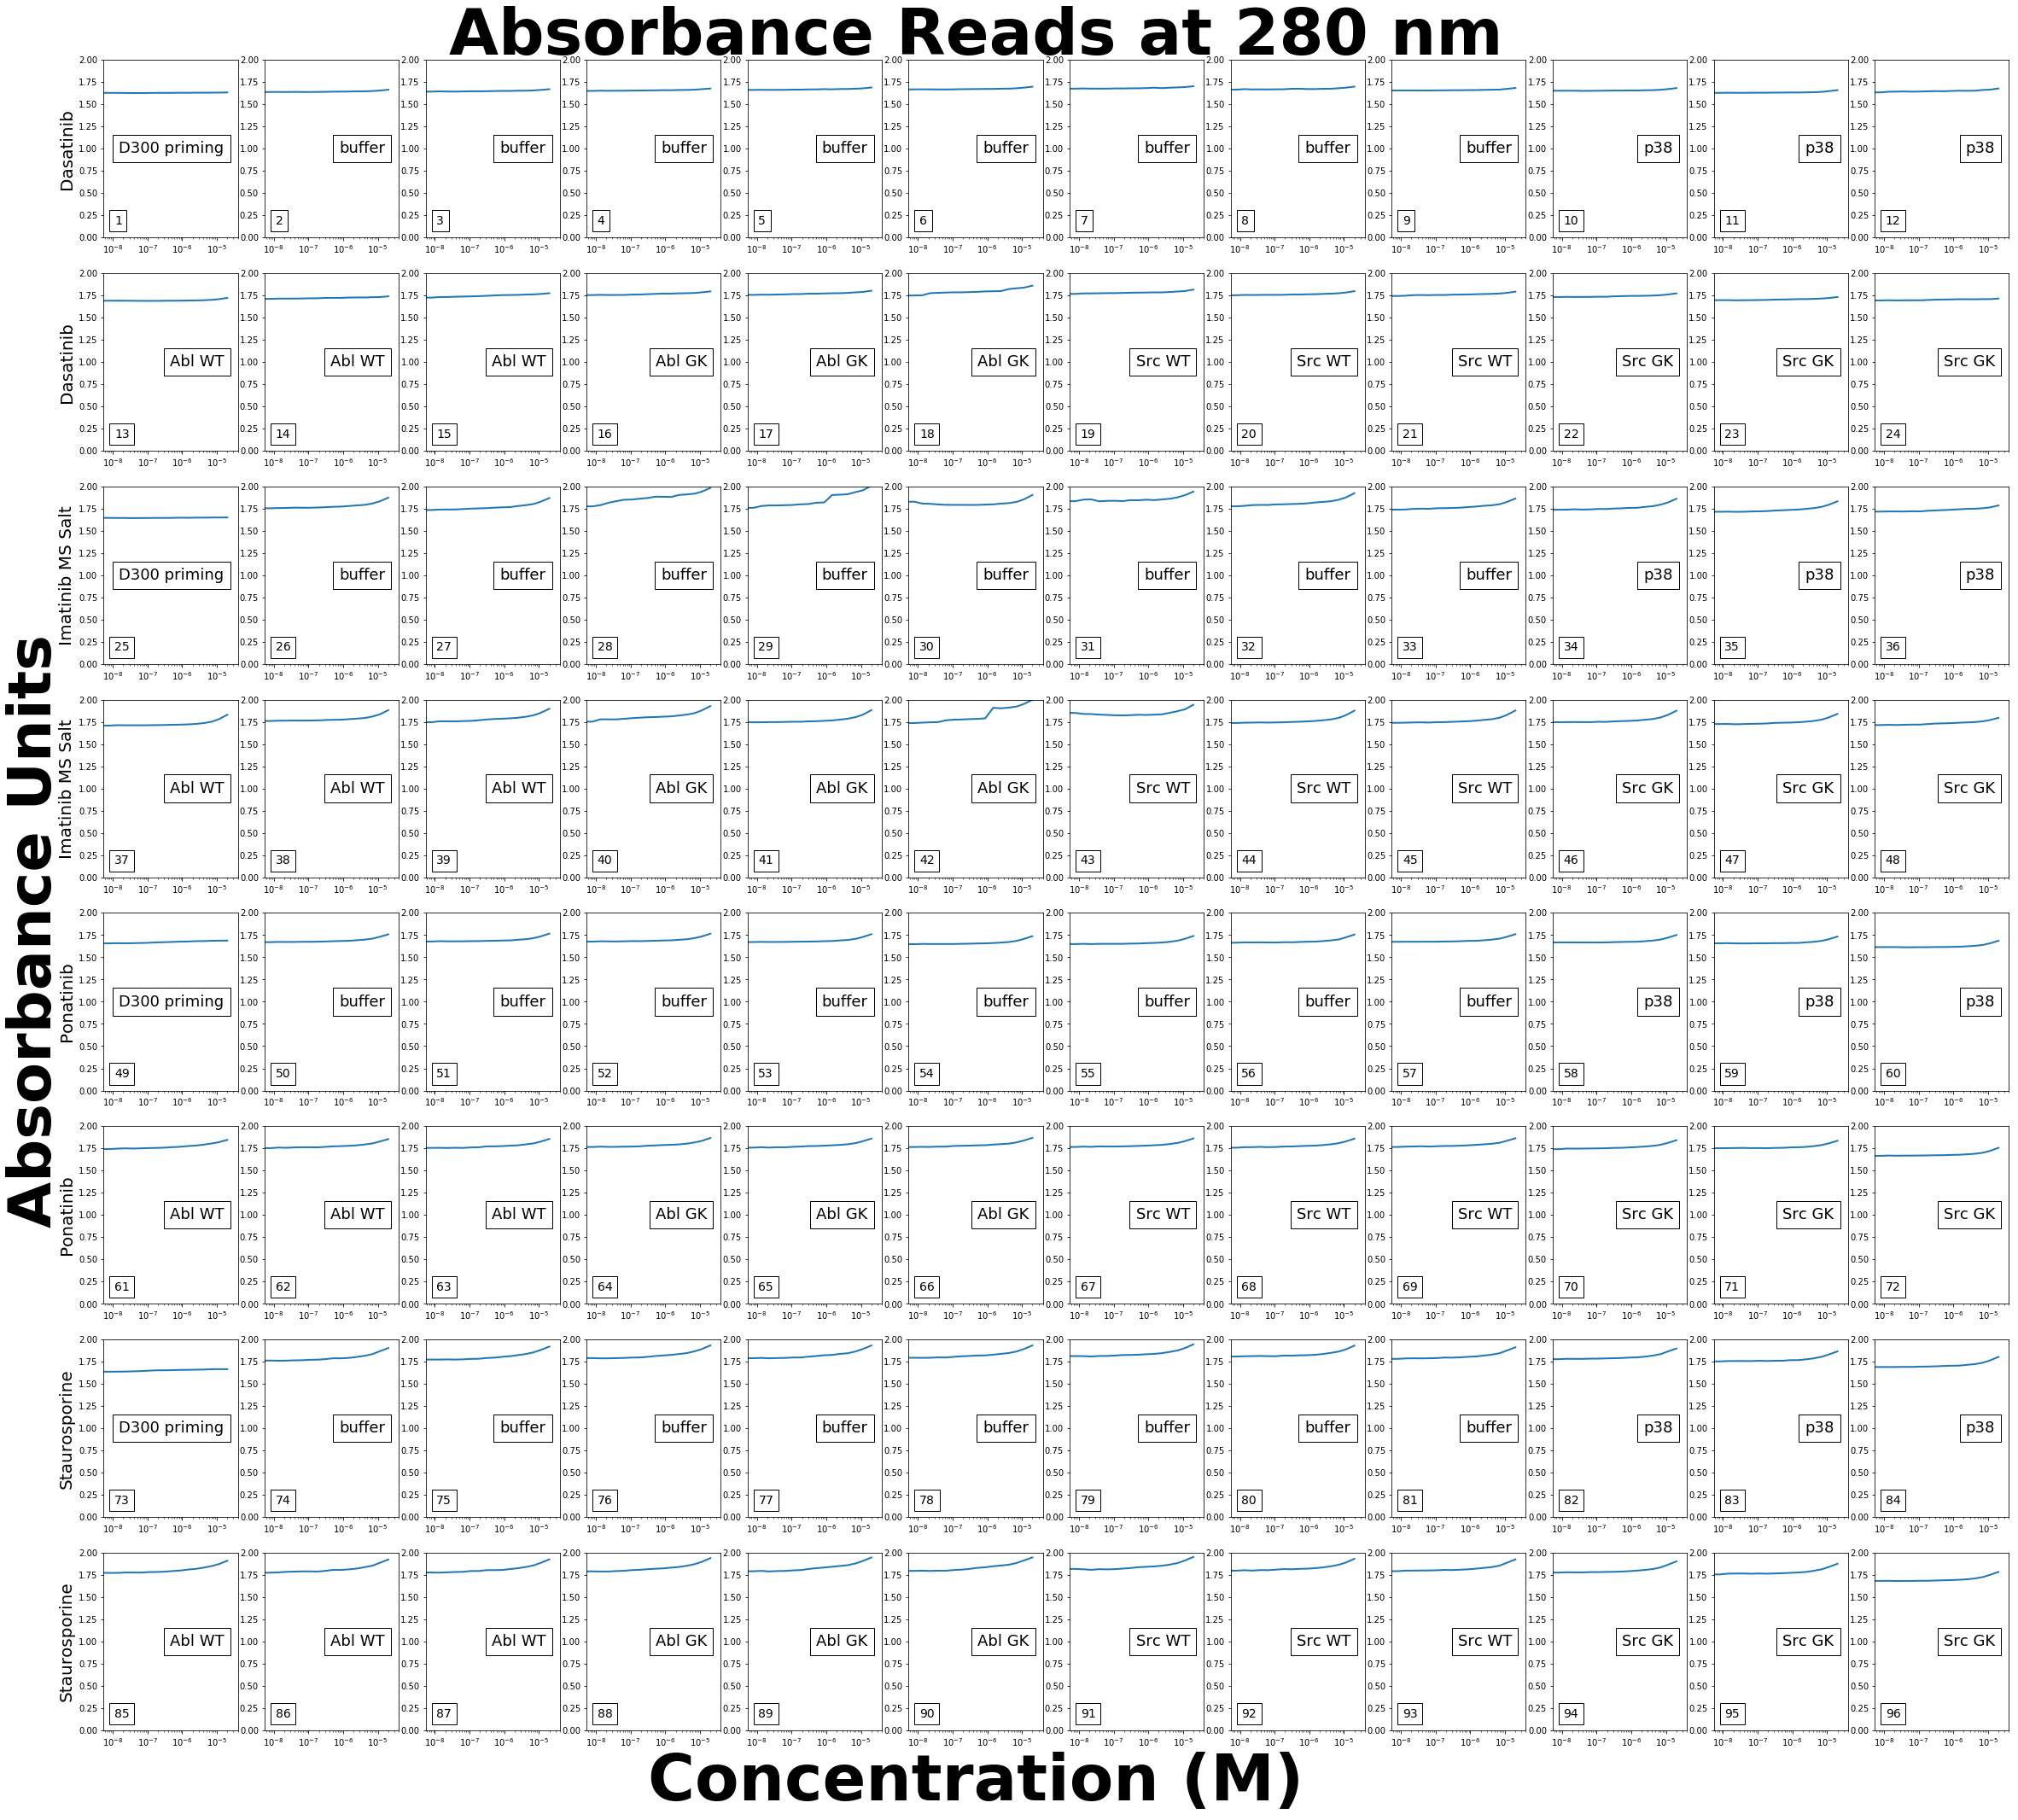

In [10]:
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Absorbance Reads at 280 nm'

x_values = concentrations
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            plt.semilogx(x_values, data_abs[row_index,col_index,:], linewidth=2)

        plt.xlim(0,4e-5)
        plt.ylim(0, 2)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='center right', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 89:
             plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=75, fontweight='bold')
        if index == 85:
            axis = plt.gca()
            plt.ylabel('Absorbance Units', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.5,4.5)
                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Dasatinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Imatinib MS Salt', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Ponatinib', fontsize=20)
        if index == 72 or index == 84:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

            
fig.savefig('20190307_single_well_ligs5-8_abs_280nm.pdf', bbox_inches='tight', dpi=300)

## Normalize data for better comparison between experiments

### normalization equation we will use: normalized_flu = [(flu_in_well_i) - (min_flu)] / [(max_flu - min_flu)]

In [19]:
# get min and max flu for each well then normalize data points (03/07/2019 data)

nrows = 8
ncols = 12

min_flu_20190307 = np.zeros([nrows, ncols], np.float64)
max_flu_20190307 = np.zeros([nrows, ncols], np.float64)
data_norm_20190307 = np.zeros([nrows, ncols, nreads], np.float64)

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements_20190307 = [(reads_20190307[i][label][well]) for i in range(nreads)]
        for i in range(nreads):
            measurements_20190307 = [x if x != 'OVER' else 70000 for x in measurements_20190307]
            measurements_20190307 = [float(i) for i in measurements_20190307]
            
        max_flu_20190307[row_index,col_index] = max(measurements_20190307)
        min_flu_20190307[row_index,col_index] = min(measurements_20190307)
        
        data_norm_20190307[row_index,col_index,:] = np.array([((i-min_flu_20190307[row_index,col_index])/(max_flu_20190307[row_index,col_index]-min_flu_20190307[row_index,col_index])) for i in measurements_20190307])
        
        print(well)
        print(data_norm_20190307[row_index,col_index])

A1
[0.03054449 0.00664011 0.         0.04515272 0.13280212 0.18592297
 0.22841965 0.37051793 0.45418327 0.58034529 0.64541833 0.71713147
 0.85524568 0.96015936 0.96547145 0.96547145 1.        ]
A2
[0.11705348 0.09283552 0.05247225 0.06760848 0.05146317 0.04137235
 0.02320888 0.01513623 0.         0.00100908 0.01816347 0.02926337
 0.0605449  0.11503532 0.25832492 0.48536831 1.        ]
A3
[0.12048193 0.08543264 0.05257393 0.08214677 0.07557503 0.04928806
 0.         0.00766703 0.01861993 0.00657174 0.00328587 0.03943045
 0.06352683 0.13800657 0.25629792 0.46440307 1.        ]
A4
[0.12846865 0.08633094 0.08119219 0.06372045 0.04624872 0.05241521
 0.02363823 0.01541624 0.         0.02261048 0.01849949 0.02055498
 0.08530319 0.1336074  0.28776978 0.4676259  1.        ]
A5
[0.14440825 0.1194354  0.1009772  0.09663409 0.08034745 0.06514658
 0.04560261 0.05537459 0.         0.0412595  0.05211726 0.06080347
 0.08360478 0.15200869 0.28555917 0.48968512 1.        ]
A6
[0.13368421 0.09578947 0.06

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

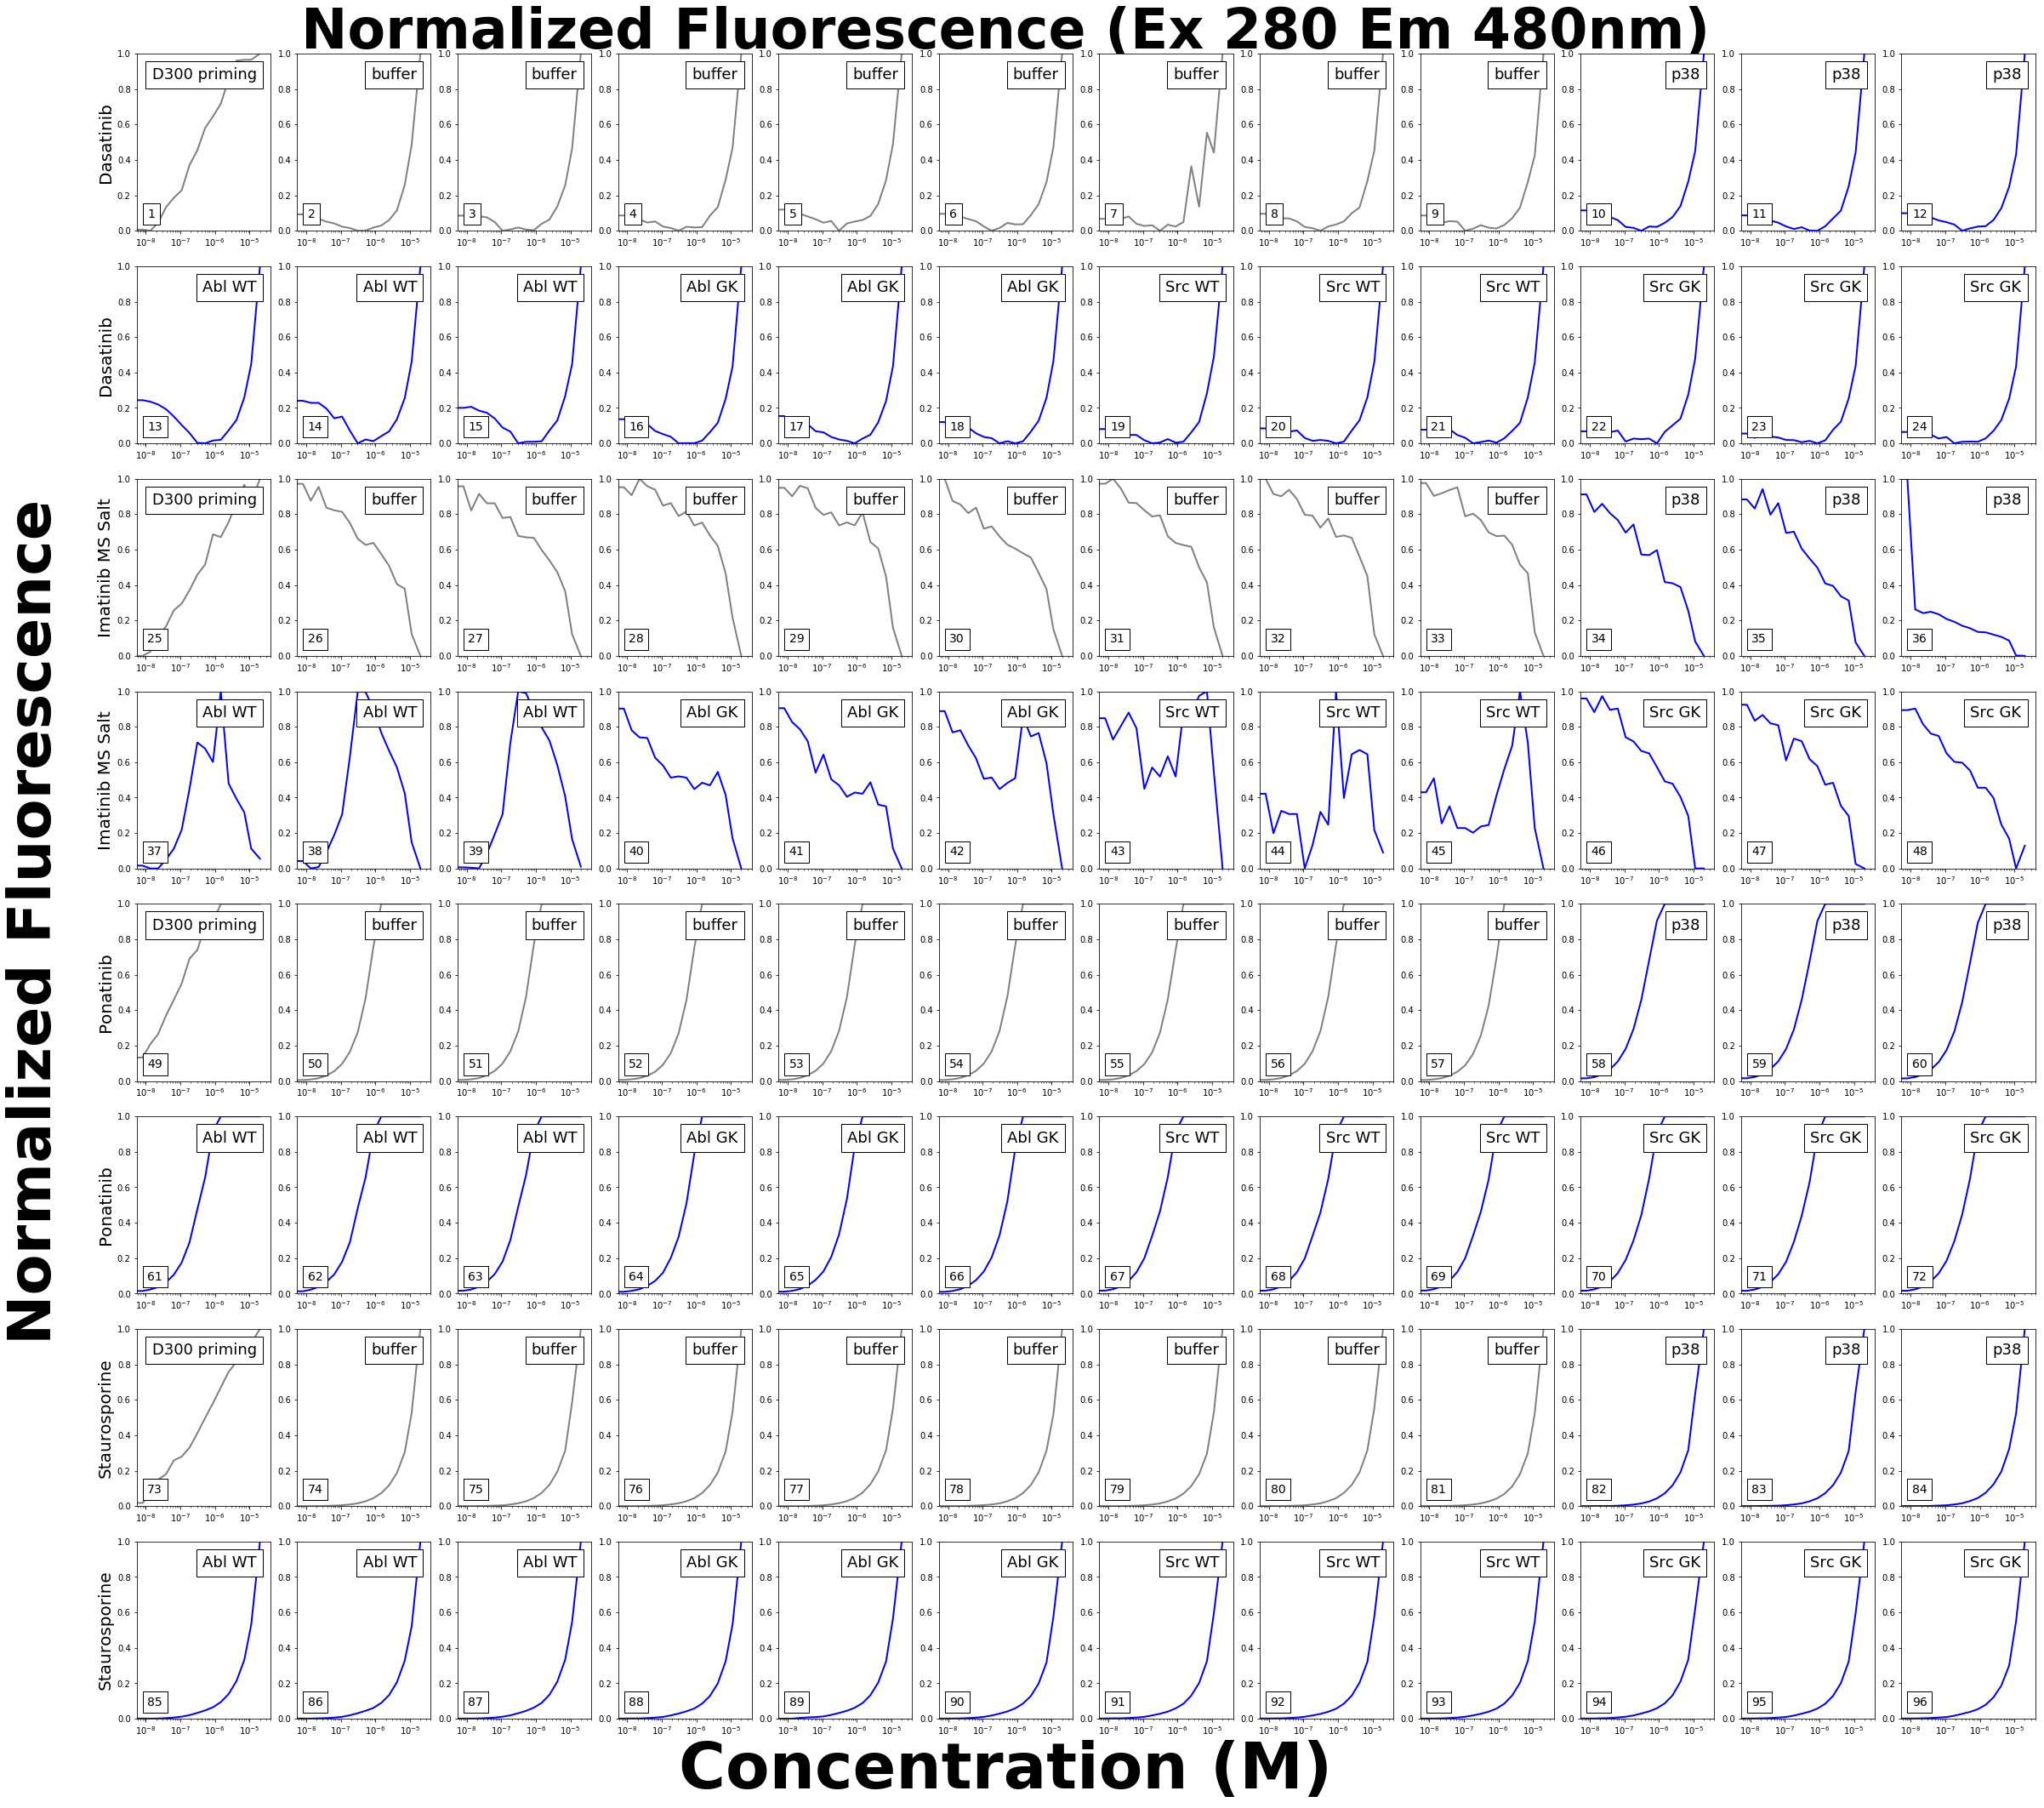

In [20]:
# plot normalized data

nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Normalized Fluorescence (Ex 280 Em 480nm)'

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color='b'
            plt.semilogx(x_values, data_norm_20190307[row_index,col_index,:], c=color, linewidth=2, label='Ligs_5-8');
           

        plt.xlim(0,4e-5)
        plt.ylim(0,1)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 89:
            plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=65, fontweight='bold')
        if index == 85:
            axis = plt.gca()
            plt.ylabel('Normalized Fluorescence', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.75,4.5)

                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Dasatinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Imatinib MS Salt', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Ponatinib', fontsize=20)
        if index == 72 or index == 84:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

fig.savefig('20190307_single_well_normalized_ligs_5-8_single_wv_log_y.pdf', bbox_inches='tight', dpi=300)